In [1]:
import numpy as np
import blimpy as bl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

numexpr.utils   INFO     Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
numexpr.utils   INFO     NumExpr defaulting to 8 threads.


In [2]:
cci = np.load('/datax/scratch/benjb/C23_L_non_anom_centroid_idxs.npy', allow_pickle=True)
ccc = np.load('/datax/scratch/benjb/C23_L_non_anom_centroids.npy', allow_pickle=True)

kmeans_labels = np.load('/datax/scratch/benjb/C23_L_kmeans_labels_k20.npy')

In [3]:
hit_params = np.load('/datax/scratch/benjb/C23_L_unique_param_array.npy', allow_pickle=True)
hit_dats = np.load('/datax/scratch/benjb/C23_L_unique_dat_list.npy', allow_pickle=True)[:,1]

In [ ]:
### NEED A WAY TO LINK TO CORRESPONDING .H5 FILES — CARMEN'S CSV?

In [4]:
hit_h5s = np.load('/datax/scratch/benjb/C23_L_unique_h5_list.npy', allow_pickle=True)

In [5]:
print(np.random.choice(kmeans_labels, 100))

[12  9  0 10 12  4 12  4  5 12  0 12  3  0  9  0 12  5 12  2  5  0  8 12
 15  6 12 12 18 15  7  9  6  5 12  6  4 12  5  9  0 17 12 12  0 12  9  5
 12  7 12  0  2 12 12  0  5 12  0 19  5  0  8 12  0  0  5 12 10  4  4  0
  5  5 16 12 12  0  0  5  5  2 12 12 18  9 12  7 12  4 12  4  7 12  4  6
 12  7  0  0]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 951585 1169758  926878  625104  710911 1375406 1158243   90609  988339
 1170829  407845  526133  259488  561556  621296 1228812 1210871  949725
 1663796  329703 1157424  920627  991260  648350  414629  689891  173504
  883273 1132693  366361 1504079  415447 1015577  682897  920306  222808
  216743  874750  648713  598821 1059168  626585 1373957  923934 1056189
  652343  185641 1219127  101248   76048   12593 1214040  629873  296249
  571058 1158378 1008084  903588 1531461  338709  702554  913071  433253
 1126023  957175 1042789  571676  931632   73071 1194304   18844 1203395
  124089   61342  258429  603450  957958 1384078   71530  815738  927757
  433032 1006507 1054073 1009112  611181  523263  433190  415691  289620
  738625 1133563  408386  260257  948032   98631  416955  295649  611999
  182498]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


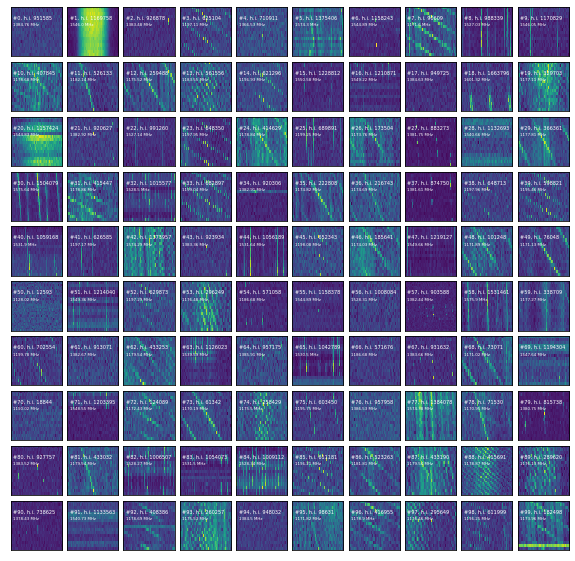

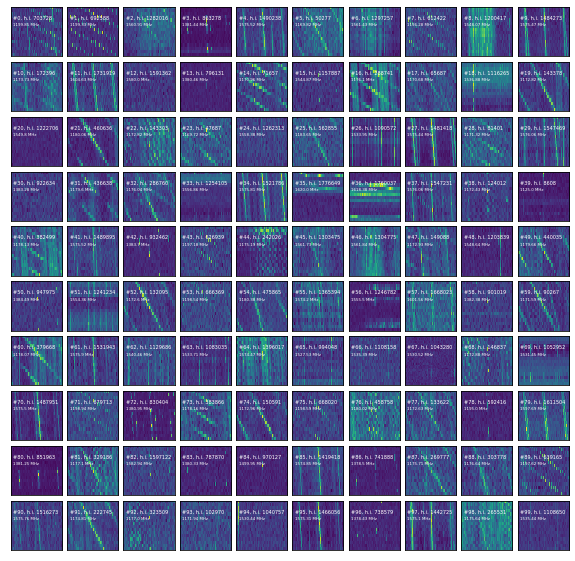

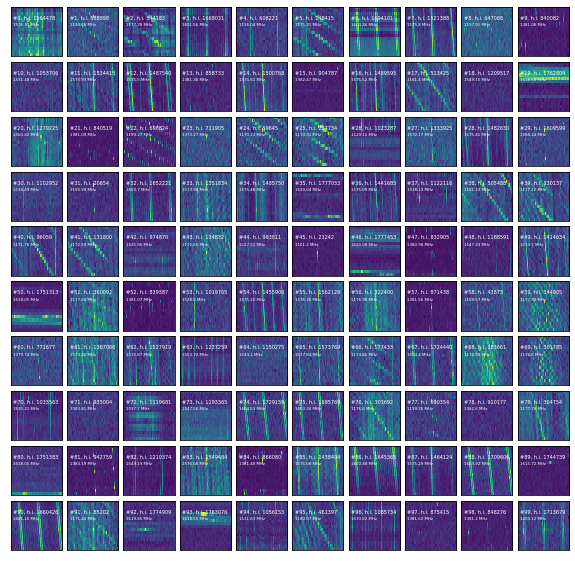

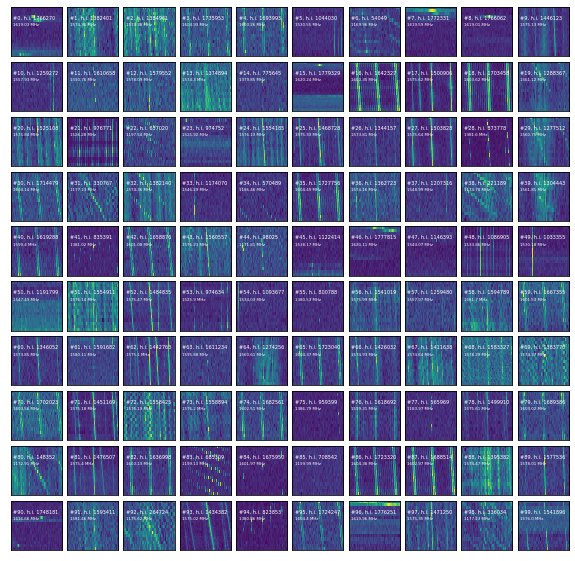

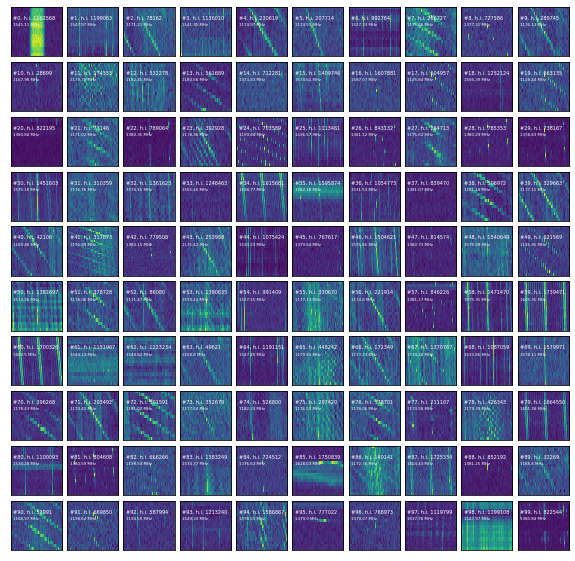

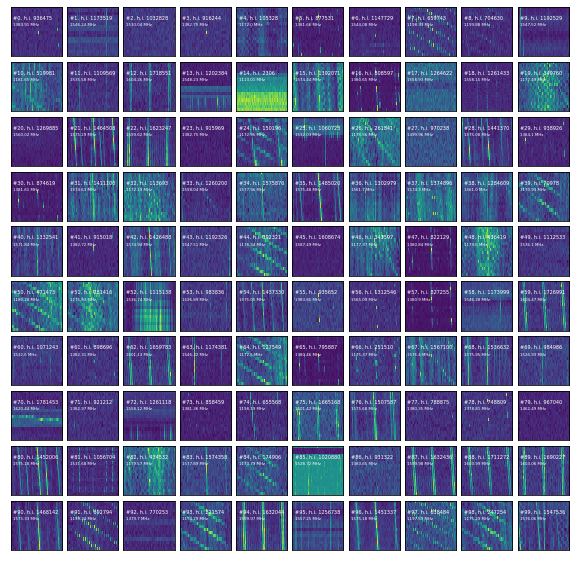

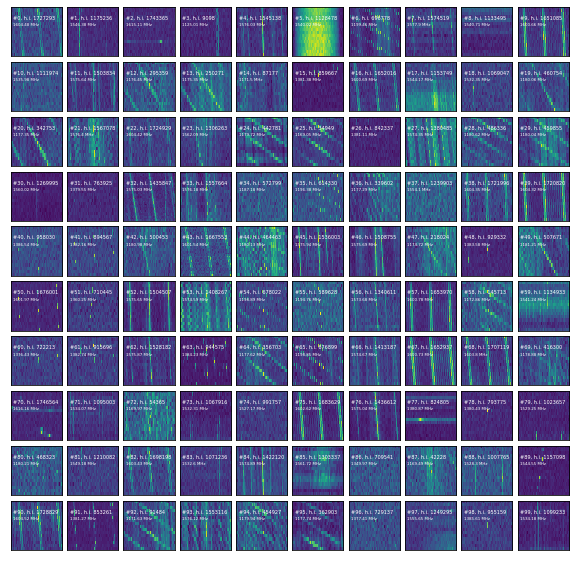

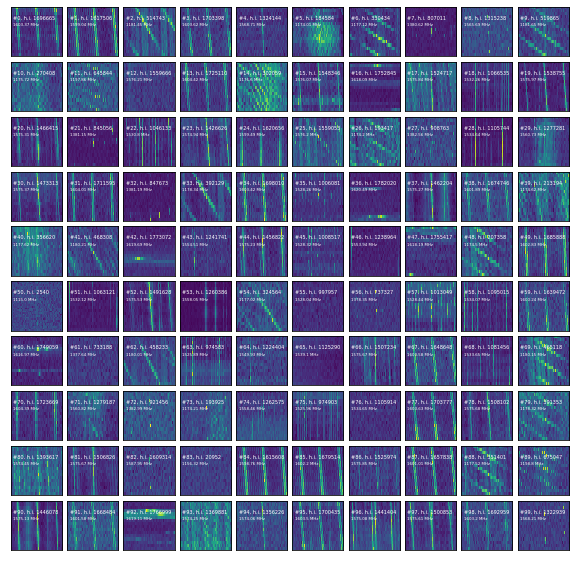

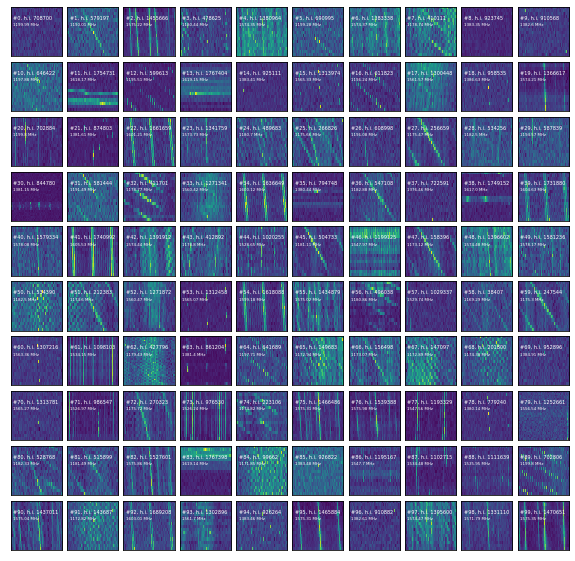

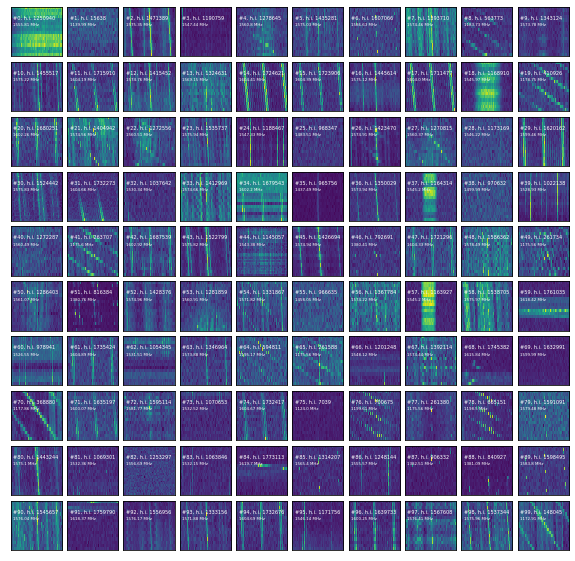

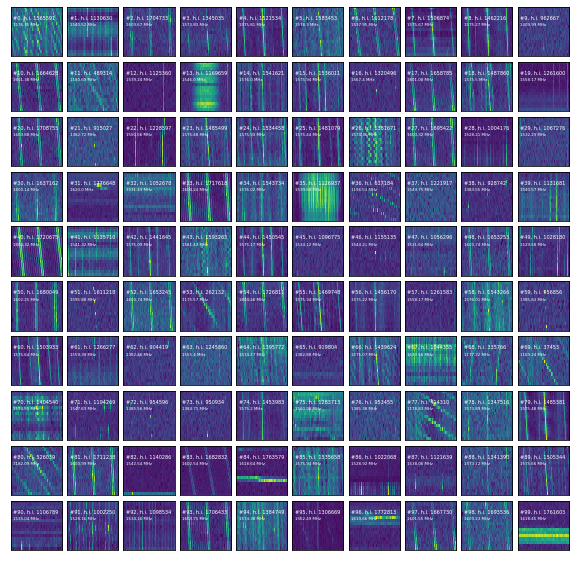

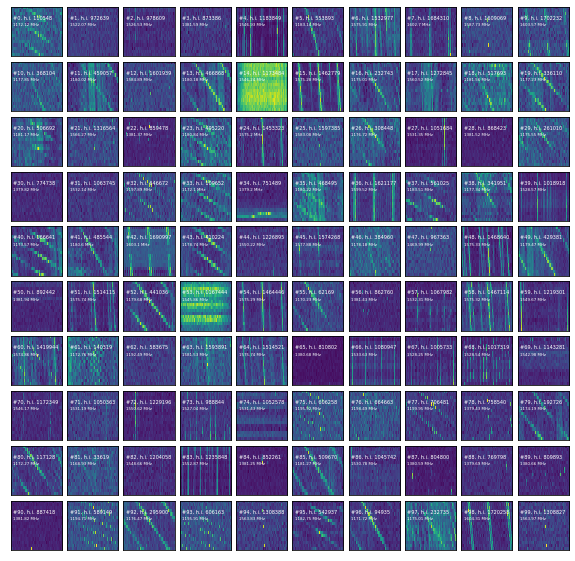

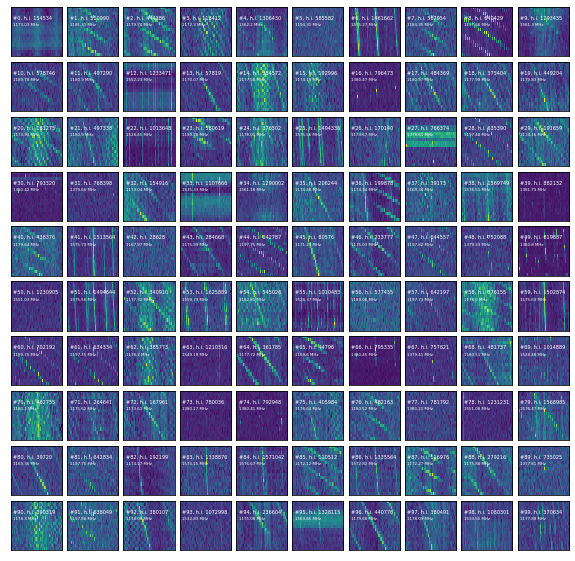

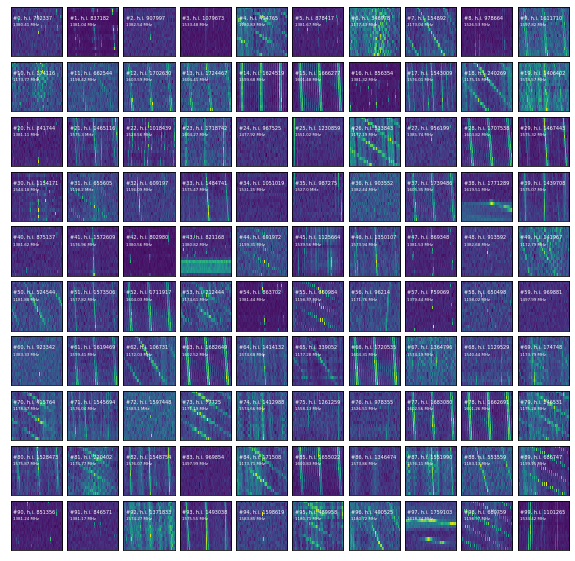

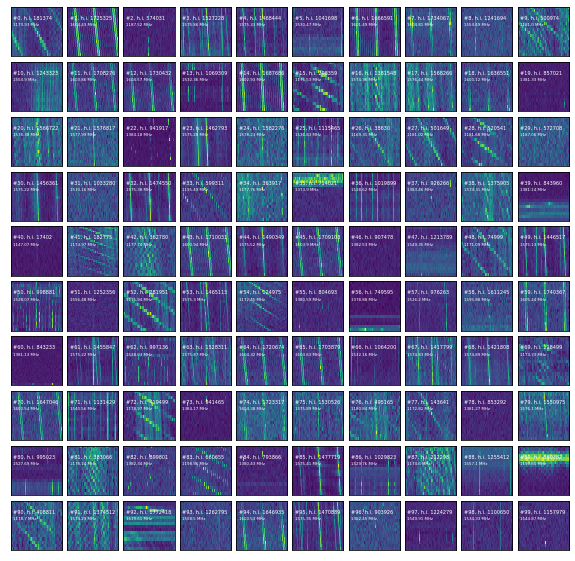

In [6]:
#random_assortment_of_labels = np.random.choice(np.arange(120), 20, replace=False)
random_assortment_of_labels = np.arange(15)
print(random_assortment_of_labels)

for label in random_assortment_of_labels:
    idxs_in_kmeans_array = np.where(kmeans_labels==label)[0]
    # pick 100 signals with that label
    idxs_random_100 = np.random.choice(idxs_in_kmeans_array, 100, replace=False)
    print(idxs_random_100)
    # plot them
    fig, axs = plt.subplots(10, 10, figsize=(10,10))
    for i in range(10):
        for j in range(10):
            print(10*i+j)
            idx = idxs_random_100[10*i+j]
            h5 = hit_h5s[idx]
            dat = hit_h5s[idx]
            freq = hit_params[idx][0]
            fb = bl.Waterfall(h5, f_start = freq-0.00135, f_stop = freq+0.00135)
            _, dynamic_spectrum = fb.grab_data()
            axs[i][j].imshow(np.log10(dynamic_spectrum), aspect='auto', interpolation='none')
            axs[i][j].text(0.05, 0.75, f'#{10*i+j}, h.i. {idx}', size=5, color='white', horizontalalignment='left', transform=axs[i][j].transAxes)
            axs[i][j].text(0.05, 0.62, f'{round(freq, 2)} MHz', size=4, color='white', horizontalalignment='left', transform=axs[i][j].transAxes)
            axs[i][j].set_xticklabels([])
            axs[i][j].set_yticklabels([])
            axs[i][j].set_yticks([])
            axs[i][j].set_xticks([])
    plt.subplots_adjust(wspace=0.1, hspace=0.12)
    plt.savefig(f'/datax/scratch/benjb/batch-matched_cluster_pdfs_k15/C23_L_class_{label}_hits.pdf', bbox_inches='tight')

    #break


In [5]:
hdb_idxs = np.load('/datax/scratch/benjb/C23_L_idxs_centroids_embedding_used_for_10k_tSNE_visualization.npz')['arr_0']
hdb_labels = np.load('/datax/scratch/benjb/C23_L_HDBSCAN_tSNE_10k_labels.npy')
print(hdb_idxs.shape)
print(hdb_labels.shape)

(10000,)
(10000,)


In [12]:
print(hdb_idxs[idxs_random_100])

[731372 664030 119864 285870 731776 754628 637023  80327 488980 333526
 702954  57671 575736 119279 554497 698562 491286 214609 316381 434793
 636169 554528 703516 578984 781760 317182 579645 464795 776121 142492
  56747 180437 443690 491007 801129 755772 347834 667880 157251 119158
 394609 800495 435773 421250 732484 287242 801401 422119 494903 667053
 502859  67257 578868 280903 180367 687207 488880 117873 115711  63325
  80025 780802 275171 210325 434564 581511 758008 282851 209272 779571
 145219 581120 158347 438972 785856 581342 306210 371225 334155 120476
 180114 398371 283206 351580 463170 680783 211071 421230 387620 283325
 973148 503572 180415 370608 802502 159290 210890 438371  46193 735560]


In [11]:
idxs_in_hdb_array = np.where(hdb_labels==2)[0]
idxs_random_100 = np.random.choice(idxs_in_hdb_array, 100, replace=False)
print(idxs_random_100)
print(hdb_labels[idxs_random_100])

[7966 4995 2611 7221 8662 2326 9768 1572 9282 8317 3102 1769 5500 1552
 3454 2738 2463 9191 2001 5054 1131 5990 5077 3356 6542 7373 9367 5827
  258  334  383 8048 1661 9305 3000 5886 6527 9073 1103 7105 7168 9464
 1258 3976 2051 1263 5039 3115  807 8272 5081 9046 9449 3795 4234 4816
  468  248 9604 9350 6914 8587 3369 5138  341 9093 6475 2606 8448 1625
  356 2330 9259  411 8953 7764 1516 6804 3960 8304 3418 8058 2563 5175
 8784 7518 9954 3880 5123 8345 8672 6644 6577 1697 2108 5777  235 7059
 1863 2619]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


[0]
[9053 3428  621 5757 6859 2957 9333 2937 1337 7133 3764 9448 2200 5900
 2192  732 1488 4556 7563 6099   35 5112 3297 9063 2610 8455 3603 5246
 6000 9899 2075 1503 9349 6687 2717 7696 7233 4351 8275 7622 8267 3972
 4158 7467 5953 5089 8906 4941   73 8467  324 4598 9856 2402  720  279
  786 9589  563 1662 1784  995 1912 1847 6707 4762 4381 1965 4735 8198
 9489 2409 5516 9224 7415  437 4613  400 4903 4601 8673 9292 7270 2876
 4743 3516 7336 4089 7651 6623 8986]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


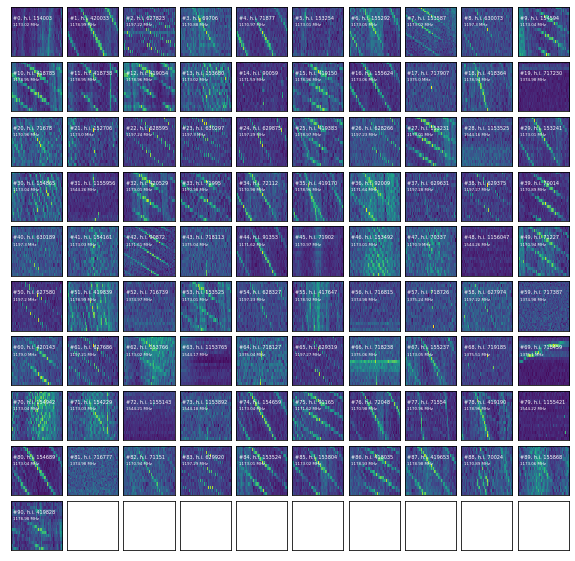

In [9]:
### THIS VERSION FOR tSNE --> HDBSCAN TEST

#random_assortment_of_labels = np.random.choice(np.arange(120), 20, replace=False)
random_assortment_of_labels = np.array([0])
print(random_assortment_of_labels)

for label in random_assortment_of_labels:
    idxs_in_hdb_array = np.where(hdb_labels==label)[0]
    #print(idxs_in_hdb_array[:100])
    # pick 100 signals with that label
    idxs_random_100 = np.random.choice(idxs_in_hdb_array, np.min([100, len(idxs_in_hdb_array)]), replace=False)
    print(idxs_random_100)
    # plot them
    fig, axs = plt.subplots(10, 10, figsize=(10,10))
    for i in range(10):
        for j in range(10):
            print(10*i+j)
            if 10*i+j < len(idxs_random_100):
                ii = idxs_random_100[10*i+j]
                idx = hdb_idxs[ii]
                h5 = hit_h5s[idx]
                dat = hit_h5s[idx]
                freq = hit_params[idx][0]
                fb = bl.Waterfall(h5, f_start = freq-0.00135, f_stop = freq+0.00135)
                _, dynamic_spectrum = fb.grab_data()
                axs[i][j].imshow(np.log10(dynamic_spectrum), aspect='auto', interpolation='none')
                axs[i][j].text(0.05, 0.75, f'#{10*i+j}, h.i. {idx}', size=5, color='white', horizontalalignment='left', transform=axs[i][j].transAxes)
                axs[i][j].text(0.05, 0.62, f'{round(freq, 2)} MHz', size=4, color='white', horizontalalignment='left', transform=axs[i][j].transAxes)
            axs[i][j].set_xticklabels([])
            axs[i][j].set_yticklabels([])
            axs[i][j].set_yticks([])
            axs[i][j].set_xticks([])
    plt.subplots_adjust(wspace=0.1, hspace=0.12)
    plt.savefig(f'/datax/scratch/benjb/batch-matched_cluster_pdfs_hdb_tSNE/C23_L_class_{label}_hits.pdf', bbox_inches='tight')

    #break
